<a href="https://colab.research.google.com/github/HSCI805/peer_review_1666/blob/main/1666.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Setup

(Installation should take at most 1 minute)

In [44]:
if ( !require('skimr') )
  install.packages("skimr")
library(skimr)

(installation took less than a minute)

In [45]:
if ( !require('sandwich') )
  install.packages("sandwich")
library(sandwich)

(installation of ```gtsummary``` will take longer, e.g.: 924 to 930)

In [46]:
if ( !require('gtsummary') )
  install.packages("gtsummary")
library(gtsummary)  

In [47]:
library(dplyr)
library(tidyverse)
#library(crosstable)
#library(rstatix)
#library(janitor)
library(scales)
#library(flextable)
library(ggplot2)
#library(msm)
library(xml2)
library(rvest)

index_df (version before Dec 4) had size 16706 x 15

In [48]:
# if ( !exists('index_df0') )
#  index_df0 <- read.csv('https://github.com/HSCI805/peer_review_1666/blob/main/index_df.csv?raw=true')

  

In [49]:
#dim(index_df0)

# 2) Load dataframe

In [50]:
if ( !exists('index_df') )
  index_df <- read.csv('https://github.com/HSCI805/peer_review_1666/blob/main/index_df_dec4.csv?raw=true')

  

In [51]:
dim(index_df)

[1] 16706    16

In [52]:
# check for missing data--------------------------------------------------------
which(is.na(index_df))

# follow exclusion criteria in paper (n = 16706) -------------------------------
index_df <- subset(index_df, (DHHGAGE != "12 TO 14 YEARS" # include age 20-69
& DHHGAGE != "15 TO 17 YEARS" 
& DHHGAGE != "18 TO 19 YEARS" 
& DHHGAGE != "80 YEARS OR MORE"
& DHHGAGE != "70 TO 74 YEARS" 
& DHHGAGE != "75 TO 79 YEARS" 
& GEOGPRV == "ONTARIO" # include Ontario
& DHH_SEX == "FEMALE" # include female sex
& PAP_022 != "REFUSAL" # include only yes/no response to pap test in last 3 years
& PAP_022 != "DON'T KNOW" 
& PAP_022 != "NOT STATED"))

# check to see if sample size of index_df is same as index study ---------------

if (nrow(index_df) == 16706) {
  print("Sample size is the same as the index study.")
} else {
  print("Sample size is not the same as the index study.")
}


integer(0)

[1] "Sample size is the same as the index study."


In [53]:
# create smaller dataframe------------------------------------------------------
index_df_2 <- index_df[c(
  "SDCGRES", "DHHGAGE", "INCGHH",
  "EDUDR04", "DHHGMS", "SDCGLHM",
  "SDCGLNG", "PAP_022", "WTS_M"
)]

# check smaller dataframe ------------------------------------------------------
summary(index_df_2)

# convert all variables in smaller dataframe to factor--------------------------

index_df_2 <- index_df_2 %>%
  mutate(
    SDCGRES = fct_relevel(SDCGRES),
    DHHGAGE = fct_relevel(DHHGAGE),
    INCGHH = fct_relevel(INCGHH),
    EDUDR04 = fct_relevel(EDUDR04),
    DHHGMS = fct_relevel(DHHGMS),
    SDCGLHM = fct_relevel(SDCGLHM),
    SDCGLNG = fct_relevel(SDCGLNG),
    PAP_022 = fct_relevel(PAP_022)
  )

summary(index_df_2)

   SDCGRES            DHHGAGE             INCGHH            EDUDR04         
 Length:16706       Length:16706       Length:16706       Length:16706      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    DHHGMS            SDCGLHM            SDCGLNG            PAP_022         
 Length:16706       Length:16706       Length:16706       Length:16706      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            

             SDCGRES                DHHGAGE                 INCGHH    
 0 TO 9 YEARS    :  675   55 TO 59 YEARS:2088   $20,000-$39,999:2690  
 10 OR MORE YEARS: 2745   60 TO 64 YEARS:1931   $40,000-$59,999:2724  
 NOT APPLICABLE  :12835   50 TO 54 YEARS:1907   $60,000-$79,999:2354  
 NOT STATED      :  451   35 TO 39 YEARS:1762   $80,000 OR MORE:5032  
                          40 TO 44 YEARS:1745   NO OR <$20,000 :1568  
                          30 TO 34 YEARS:1609   NOT STATED     :2338  
                          (Other)       :5664                         
             EDUDR04                   DHHGMS                 SDCGLHM     
 < THAN SECONDARY: 1900   COMMON-LAW      :1281   ENG. W-W/O OTHER:14406  
 NOT STATED      :  422   MARRIED         :9085   ENG./FRE. W-W/O :  122  
 OTHER POST-SEC. : 1081   NOT STATED      :  35   FRE. W-W/O OTHER:  516  
 POST-SEC. GRAD. :10349   SINGLE/NEVER MAR:3166   NOT ENGL. / FRE.: 1300  
 SECONDARY GRAD. : 2954   WIDOW/SEP/DIV   :3139   NOT STA

In [54]:
# relabel and relevel immigrant status variable---------------------------------

index_df_2$sdcgres <- factor(index_df_2$SDCGRES,
  levels = c(
    "NOT APPLICABLE",
    "0 TO 9 YEARS",
    "10 OR MORE YEARS",
    "NOT STATED"
  )
)

levels(index_df_2$sdcgres) <- c(
  "Non-immigrant",
  "Recent immigrant",
  "Non-recent immigrant",
  "Unknown"
)

In [56]:
# relevel age-------------------------------------------------------------------
index_df_2$dhhgage <- factor(index_df_2$DHHGAGE,
  levels = c(
    "20 TO 24 YEARS",
    "25 TO 29 YEARS",
    "30 TO 34 YEARS",
    "35 TO 39 YEARS",
    "40 TO 44 YEARS",
    "45 TO 49 YEARS",
    "50 TO 54 YEARS",
    "55 TO 59 YEARS",
    "60 TO 64 YEARS",
    "65 TO 69 YEARS"
  )
)

# create new age column---------------------------------------------------------
index_df_2$age <- index_df_2$DHHGAGE

# recode new age column---------------------------------------------------------
levels(index_df_2$age) <- c(
  "20-34",
  "20-34",
  "20-34",
  "35-54",
  "35-54",
  "35-54",
  "35-54",
  "55-69",
  "55-69",
  "55-69"
)

# relevel income----------------------------------------------------------------
index_df_2$income <- factor(index_df_2$INCGHH,
  levels = c(
    "NO OR <$20,000",
    "$20,000-$39,999",
    "$40,000-$59,999",
    "$60,000-$79,999",
    "$80,000 OR MORE",
    "NOT STATED"
  )
)

# relabel income----------------------------------------------------------------
levels(index_df_2$income) <- c(
  "Less than $20 000",
  "$20,000-$39,999",
  "$40,000-$59,999",
  "$60,000-$79,999",
  "$80,000 or more",
  "Unknown"
)

# relevel education-------------------------------------------------------------
index_df_2$education <- factor(index_df_2$EDUDR04,
  levels = c(
    "< THAN SECONDARY",
    "SECONDARY GRAD.",
    "OTHER POST-SEC.",
    "POST-SEC. GRAD.",
    "NOT STATED"
  )
)

# recode new education column---------------------------------------------------
levels(index_df_2$education) <- c(
  "Secondary graduation or less",
  "Secondary graduation or less",
  "Any post-secondary education",
  "Any post-secondary education",
  "Unknown"
)

# relevel marital status--------------------------------------------------------
index_df_2$ms <- factor(index_df_2$DHHGMS,
  levels = c(
    "MARRIED",
    "COMMON-LAW",
    "WIDOW/SEP/DIV",
    "SINGLE/NEVER MAR",
    "NOT STATED"
  )
)

# recode new marital status column-----------------------------------------------
levels(index_df_2$ms) <- c(
  "Married/common-law",
  "Married/common-law",
  "Widowed/separated/divorced",
  "Single/never married",
  "Unknown"
)


# create new language spoken at home column-------------------------------------
index_df_2$language_home <- index_df_2$SDCGLHM

# relevel new column languages spoken at home-----------------------------------
levels(index_df_2$language_home) <- c(
  "English", # English
  "English", # English and French
  "Other", # French
  "English", # Other
  "Unknown"
) # Unknown

# Note:
# I think this was misdone in the original data set
# because the only way to get 516 as the total sample as the other category in table 1,
# is if they used French (with or without other) on it's own as the 'other' category.
# However, It should have been the French and Other category grouped into other?
# correct in 'extension 1'


In [57]:
# create new language converse column-------------------------------------------
index_df_2$language_converse <- index_df_2$SDCGLNG

# relevel new column language converse------------------------------------------
levels(index_df_2$language_converse) <- c(
  "English", # English
  "English", # English and French
  "Other", # French
  "English", # Other
  "Unknown"
) # Unknown

# I think this was misdone in the original data set,
# because the only way to get 46 as the other category,
# is if they used French (with or without other) on it's own as the 'other' category
# However, It should have been the French and Other category grouped into other?
# correct in 'extension 1'

# create new column for pap test outcome----------------------------------------
index_df_2$pap_outcome <- index_df_2$PAP_022

# relevel new column pap outcome------------------------------------------------
levels(index_df_2$pap_outcome) <- c(
  "Yes",
  "Yes",
  "No",
  "No",
  "Yes",
  "Not applicable"
)


In [58]:
# create descriptive statistic table--------------------------------------------

## create first two rows--------------------------------------------------------
skim(index_df_2)


── Data Summary ────────────────────────
                           Values    
Name                       index_df_2
Number of rows             16706     
Number of columns          18        
_______________________              
Column type frequency:               
  factor                   17        
  numeric                  1         
________________________             
Group variables            None      

── Variable type: factor ───────────────────────────────────────────────────────
   skim_variable     n_missing complete_rate ordered n_unique
 1 SDCGRES                   0             1 FALSE          4
 2 DHHGAGE                   0             1 FALSE         10
 3 INCGHH                    0             1 FALSE          6
 4 EDUDR04                   0             1 FALSE          5
 5 DHHGMS                    0             1 FALSE          5
 6 SDCGLHM                   0             1 FALSE          5
 7 SDCGLNG                   0             1 FALSE          5
 

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


In [59]:
# source('https://github.com/ddsjoberg/gtsummary/blob/main/R/add_overall.R')

In [60]:
table_one <- index_df_2 %>%
  select(
    sdcgres, age, INCGHH, education, ms, language_home, language_converse,
    pap_outcome
  ) %>%
  tbl_summary(
    by = pap_outcome,
    percent = "row",
    statistic = list(all_categorical() ~ "{n}"),
    label = list(
      sdcgres ~ "Immigrant status",
      age ~ "Age (years)",
      INCGHH ~ "Income",
      education ~ "Highest level of education",
      ms ~ "Marital status",
      language_home ~ "Language spoken most often at home",
      language_converse ~ "Language respondent could converse in"
    )
  ) %>%
  add_overall()

## need to do calculations on the table so convert to dataframe-----------------

table_one_df <- as_tibble(table_one)
table_one_df <- rename(table_one_df, characteristic = `**Characteristic**`)
table_one_df <- rename(table_one_df, total_sample = `**Overall**, N = 16,706`)
table_one_df <- rename(table_one_df, pap_yes = `**Yes**, N = 12,429`)
table_one_df <- rename(table_one_df, pap_no = `**No**, N = 3,230`)
table_one_df <- rename(table_one_df, pap_na = `**Not applicable**, N = 1,047`)

table_one_df <- data.frame(table_one_df)

In [61]:
## remove commas in table one dataframe-----------------------------------------

table_one_df$total_sample <- gsub(",", "", table_one_df$total_sample)
table_one_df$pap_yes <- gsub(",", "", table_one_df$pap_yes)
table_one_df$pap_no <- gsub(",", "", table_one_df$pap_no)
table_one_df$pap_na <- gsub(",", "", table_one_df$pap_na)

## convert table one columns to numeric-----------------------------------------
table_one_df$total_sample <- as.numeric(table_one_df$total_sample)
table_one_df$pap_yes <- as.numeric(table_one_df$pap_yes)
table_one_df$pap_no <- as.numeric(table_one_df$pap_no)
table_one_df$pap_na <- as.numeric(table_one_df$pap_na)

## check columns of table one---------------------------------------------------
summary(table_one_df)

## create new column for the unweighted prevalence of pap_yes ------------------
table_one_df$pap_prevalence <- table_one_df$pap_yes / table_one_df$total_sample

## create empty column for weighted_pap_prevalence------------------------------
table_one_df["weighted_pap_prevalence"] <- NA

## rename weights & account for weight in immigrant classification--------------
index_df_2$wts_m <- as.numeric(index_df_2$WTS_M)

 characteristic      total_sample        pap_yes            pap_no       
 Length:33          Min.   :   35.0   Min.   :   26.0   Min.   :   5.00  
 Class :character   1st Qu.:  555.8   1st Qu.:  385.5   1st Qu.:  98.75  
 Mode  :character   Median : 2734.5   Median : 1989.0   Median : 505.50  
                    Mean   : 4497.8   Mean   : 3346.3   Mean   : 869.62  
                    3rd Qu.: 5450.5   3rd Qu.: 4009.0   3rd Qu.:1248.25  
                    Max.   :16271.0   Max.   :12144.0   Max.   :3132.00  
                    NA's   :7         NA's   :7         NA's   :7        
     pap_na     
 Min.   :  2.0  
 1st Qu.: 67.5  
 Median :202.0  
 Mean   :281.9  
 3rd Qu.:390.2  
 Max.   :995.0  
 NA's   :7      

In [62]:
### non-immigrant weighted------------------------------------------------------
w_non_im_y <- sum(index_df_2[which(index_df_2$sdcgres == "Non-immigrant" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_non_im_n <- sum(index_df_2[which(index_df_2$sdcgres == "Non-immigrant" & index_df_2$pap_outcome == "No"), "wts_m"])
w_non_im_na <- sum(index_df_2[which(index_df_2$sdcgres == "Non-immigrant" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### non-recent immigrant weighted-----------------------------------------------
w_non_rec_im_y <- sum(index_df_2[which(index_df_2$sdcgres == "Non-recent immigrant" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_non_rec_im_n <- sum(index_df_2[which(index_df_2$sdcgres == "Non-recent immigrant" & index_df_2$pap_outcome == "No"), "wts_m"])
w_non_rec_im_na <- sum(index_df_2[which(index_df_2$sdcgres == "Non-recent immigrant" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### recent immigrant weighted---------------------------------------------------
w_rec_im_y <- sum(index_df_2[which(index_df_2$sdcgres == "Recent immigrant" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_rec_im_n <- sum(index_df_2[which(index_df_2$sdcgres == "Recent immigrant" & index_df_2$pap_outcome == "No"), "wts_m"])
w_rec_im_na <- sum(index_df_2[which(index_df_2$sdcgres == "Recent immigrant" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### immigrant unknown weighted--------------------------------------------------
w_unknown_im_y <- sum(index_df_2[which(index_df_2$sdcgres == "Unknown" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_unknown_im_n <- sum(index_df_2[which(index_df_2$sdcgres == "Unknown" & index_df_2$pap_outcome == "No"), "wts_m"])
w_unknown_im_na <- sum(index_df_2[which(index_df_2$sdcgres == "Unknown" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

## fill in the rows for immigration in weighted_pap_prevalence column in table_one_df
table_one_df[5, "weighted_pap_prevalence"] <- (w_unknown_im_y / (w_unknown_im_n + w_unknown_im_y + w_unknown_im_na))
table_one_df[2, "weighted_pap_prevalence"] <- (w_non_im_y / (w_non_im_n + w_non_im_y + w_non_im_na))
table_one_df[4, "weighted_pap_prevalence"] <- (w_non_rec_im_y / (w_non_rec_im_n + w_non_rec_im_y + w_non_rec_im_na))
table_one_df[3, "weighted_pap_prevalence"] <- (w_rec_im_y / (w_rec_im_n + w_rec_im_y + w_rec_im_na))

## account for weight in age classification-------------------------------------

In [63]:
### age 20-34 weighted----------------------------------------------------------
w_age_2034_y <- sum(index_df_2[which(index_df_2$age == "20-34" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_age_2034_n <- sum(index_df_2[which(index_df_2$age == "20-34" & index_df_2$pap_outcome == "No"), "wts_m"])
w_age_2034_na <- sum(index_df_2[which(index_df_2$age == "20-34" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### age 35-54 weighted----------------------------------------------------------
w_age_3554_y <- sum(index_df_2[which(index_df_2$age == "35-54" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_age_3554_n <- sum(index_df_2[which(index_df_2$age == "35-54" & index_df_2$pap_outcome == "No"), "wts_m"])
w_age_3554_na <- sum(index_df_2[which(index_df_2$age == "35-54" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### age 55-69 weighted----------------------------------------------------------
w_age_5569_y <- sum(index_df_2[which(index_df_2$age == "55-69" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_age_5569_n <- sum(index_df_2[which(index_df_2$age == "55-69" & index_df_2$pap_outcome == "No"), "wts_m"])
w_age_5569_na <- sum(index_df_2[which(index_df_2$age == "55-69" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

## fill in the rows for age in weighted_pap_prevalence column in table_one_df-----
table_one_df[7, "weighted_pap_prevalence"] <- (w_age_2034_y / (w_age_2034_n + w_age_2034_y + w_age_2034_na))
table_one_df[8, "weighted_pap_prevalence"] <- (w_age_3554_y / (w_age_3554_n + w_age_3554_y + w_age_3554_na))
table_one_df[9, "weighted_pap_prevalence"] <- (w_age_5569_y / (w_age_5569_n + w_age_5569_y + w_age_5569_na))

## account for weight in income classification----------------------------------

### income < 20 000-------------------------------------------------------------
w_income_less_20000_y <- sum(index_df_2[which(index_df_2$income == "Less than $20 000" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_income_less_20000_n <- sum(index_df_2[which(index_df_2$income == "Less than $20 000" & index_df_2$pap_outcome == "No"), "wts_m"])
w_income_less_20000_na <- sum(index_df_2[which(index_df_2$income == "Less than $20 000" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### income $20,000-$39,999------------------------------------------------------
w_income_2039_y <- sum(index_df_2[which(index_df_2$income == "$20,000-$39,999" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_income_2039_n <- sum(index_df_2[which(index_df_2$income == "$20,000-$39,999" & index_df_2$pap_outcome == "No"), "wts_m"])
w_income_2039_na <- sum(index_df_2[which(index_df_2$income == "$20,000-$39,999" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### income $40,000-$59,999------------------------------------------------------
w_income_4059_y <- sum(index_df_2[which(index_df_2$income == "$40,000-$59,999" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_income_4059_n <- sum(index_df_2[which(index_df_2$income == "$40,000-$59,999" & index_df_2$pap_outcome == "No"), "wts_m"])
w_income_4059_na <- sum(index_df_2[which(index_df_2$income == "$40,000-$59,999" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### income $60,000-$79,999------------------------------------------------------
w_income_6079_y <- sum(index_df_2[which(index_df_2$income == "$60,000-$79,999" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_income_6079_n <- sum(index_df_2[which(index_df_2$income == "$60,000-$79,999" & index_df_2$pap_outcome == "No"), "wts_m"])
w_income_6079_na <- sum(index_df_2[which(index_df_2$income == "$60,000-$79,999" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### income $80,000 or more------------------------------------------------------
w_income_80_more_y <- sum(index_df_2[which(index_df_2$income == "$80,000 or more" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_income_80_more_n <- sum(index_df_2[which(index_df_2$income == "$80,000 or more" & index_df_2$pap_outcome == "No"), "wts_m"])
w_income_80_more_na <- sum(index_df_2[which(index_df_2$income == "$80,000 or more" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### income unknown--------------------------------------------------------------
w_income_unknown_y <- sum(index_df_2[which(index_df_2$income == "Unknown" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_income_unknown_n <- sum(index_df_2[which(index_df_2$income == "Unknown" & index_df_2$pap_outcome == "No"), "wts_m"])
w_income_unknown_na <- sum(index_df_2[which(index_df_2$income == "Unknown" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

## fill in the rows for age in weighted_pap_prevalence column in table_one_df---
table_one_df[11, "weighted_pap_prevalence"] <- (w_income_less_20000_y / (w_income_less_20000_n + w_income_less_20000_y + w_income_less_20000_na))
table_one_df[12, "weighted_pap_prevalence"] <- (w_income_2039_y / (w_income_2039_n + w_income_2039_y + w_income_2039_na))
table_one_df[13, "weighted_pap_prevalence"] <- (w_income_4059_y / (w_income_4059_n + w_income_4059_y + w_income_4059_na))
table_one_df[14, "weighted_pap_prevalence"] <- (w_income_6079_y / (w_income_6079_n + w_income_6079_y + w_income_6079_na))
table_one_df[15, "weighted_pap_prevalence"] <- (w_income_80_more_y / (w_income_80_more_n + w_income_80_more_y + w_income_80_more_na))
table_one_df[16, "weighted_pap_prevalence"] <- (w_income_unknown_y / (w_income_unknown_n + w_income_unknown_y + w_income_unknown_na))

## account for weight in highest level of education ----------------------------


In [64]:

### secondary or less-----------------------------------------------------------
w_edu_sec_less_y <- sum(index_df_2[which(index_df_2$education == "Secondary graduation or less" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_edu_sec_less_n <- sum(index_df_2[which(index_df_2$education == "Secondary graduation or less" & index_df_2$pap_outcome == "No"), "wts_m"])
w_edu_sec_less_na <- sum(index_df_2[which(index_df_2$education == "Secondary graduation or less" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### any post secondary----------------------------------------------------------
w_edu_post_sec_y <- sum(index_df_2[which(index_df_2$education == "Any post-secondary education" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_edu_post_sec_n <- sum(index_df_2[which(index_df_2$education == "Any post-secondary education" & index_df_2$pap_outcome == "No"), "wts_m"])
w_edu_post_sec_na <- sum(index_df_2[which(index_df_2$education == "Any post-secondary education" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### unknown---------------------------------------------------------------------
w_edu_unknown_y <- sum(index_df_2[which(index_df_2$education == "Unknown" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_edu_unknown_n <- sum(index_df_2[which(index_df_2$education == "Unknown" & index_df_2$pap_outcome == "No"), "wts_m"])
w_edu_unknown_na <- sum(index_df_2[which(index_df_2$education == "Unknown" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

## fill in the rows for education in weighted_pap_prevalence column in table_one_df
table_one_df[18, "weighted_pap_prevalence"] <- (w_edu_sec_less_y / (w_edu_sec_less_n + w_edu_sec_less_y + w_edu_sec_less_na))
table_one_df[19, "weighted_pap_prevalence"] <- (w_edu_post_sec_y / (w_edu_post_sec_n + w_edu_post_sec_y + w_edu_post_sec_na))
table_one_df[20, "weighted_pap_prevalence"] <- (w_edu_unknown_y / (w_edu_unknown_n + w_edu_unknown_y + w_edu_unknown_na))

## account for weight in marital status ----------------------------------------

### married/common-law----------------------------------------------------------
w_ms_partner_y <- sum(index_df_2[which(index_df_2$ms == "Married/common-law" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_ms_partner_n <- sum(index_df_2[which(index_df_2$ms == "Married/common-law" & index_df_2$pap_outcome == "No"), "wts_m"])
w_ms_partner_na <- sum(index_df_2[which(index_df_2$ms == "Married/common-law" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### widowed/separated/divorced--------------------------------------------------
w_ms_wsd_y <- sum(index_df_2[which(index_df_2$ms == "Widowed/separated/divorced" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_ms_wsd_n <- sum(index_df_2[which(index_df_2$ms == "Widowed/separated/divorced" & index_df_2$pap_outcome == "No"), "wts_m"])
w_ms_wsd_na <- sum(index_df_2[which(index_df_2$ms == "Widowed/separated/divorced" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### single/never married--------------------------------------------------------
w_ms_sm_y <- sum(index_df_2[which(index_df_2$ms == "Single/never married" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_ms_sm_n <- sum(index_df_2[which(index_df_2$ms == "Single/never married" & index_df_2$pap_outcome == "No"), "wts_m"])
w_ms_sm_na <- sum(index_df_2[which(index_df_2$ms == "Single/never married" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### unknown---------------------------------------------------------------------
w_ms_unknown_y <- sum(index_df_2[which(index_df_2$ms == "Unknown" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_ms_unknown_n <- sum(index_df_2[which(index_df_2$ms == "Unknown" & index_df_2$pap_outcome == "No"), "wts_m"])
w_ms_unknown_na <- sum(index_df_2[which(index_df_2$ms == "Unknown" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

## fill in the rows for education in weighted_pap_prevalence column in table_one_df
table_one_df[22, "weighted_pap_prevalence"] <- (w_ms_partner_y / (w_ms_partner_n + w_ms_partner_y + w_ms_partner_na))
table_one_df[23, "weighted_pap_prevalence"] <- (w_ms_wsd_y / (w_ms_wsd_n + w_ms_wsd_y + w_ms_wsd_na))
table_one_df[24, "weighted_pap_prevalence"] <- (w_ms_sm_y / (w_ms_sm_n + w_ms_sm_y + w_ms_sm_na))
table_one_df[25, "weighted_pap_prevalence"] <- (w_ms_unknown_y / (w_ms_unknown_n + w_ms_unknown_y + w_ms_unknown_na))

## account for weight in Language spoken most often at home --------------------

#### english--------------------------------------------------------------------
w_lang_home_english_y <- sum(index_df_2[which(index_df_2$language_home == "English" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_lang_home_english_n <- sum(index_df_2[which(index_df_2$language_home == "English" & index_df_2$pap_outcome == "No"), "wts_m"])
w_lang_home_english_na <- sum(index_df_2[which(index_df_2$language_home == "English" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### other-----------------------------------------------------------------------
w_lang_home_other_y <- sum(index_df_2[which(index_df_2$language_home == "Other" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_lang_home_other_n <- sum(index_df_2[which(index_df_2$language_home == "Other" & index_df_2$pap_outcome == "No"), "wts_m"])
w_lang_home_other_na <- sum(index_df_2[which(index_df_2$language_home == "Other" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### unknown---------------------------------------------------------------------
w_lang_home_unknown_y <- sum(index_df_2[which(index_df_2$language_home == "Unknown" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_lang_home_unknown_n <- sum(index_df_2[which(index_df_2$language_home == "Unknown" & index_df_2$pap_outcome == "No"), "wts_m"])
w_lang_home_unknown_na <- sum(index_df_2[which(index_df_2$language_home == "Unknown" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

## fill in the rows for language in weighted_pap_prevalence column in table_one_df
table_one_df[27, "weighted_pap_prevalence"] <- (w_lang_home_english_y / (w_lang_home_english_n + w_lang_home_english_y + w_lang_home_english_na))
table_one_df[28, "weighted_pap_prevalence"] <- (w_lang_home_other_y / (w_lang_home_other_n + w_lang_home_other_y + w_lang_home_other_na))
table_one_df[29, "weighted_pap_prevalence"] <- (w_lang_home_unknown_y / (w_lang_home_unknown_n + w_lang_home_unknown_y + w_lang_home_unknown_na))

## account for weight in Language spoken most often at home --------------------

### english---------------------------------------------------------------------
w_lang_con_english_y <- sum(index_df_2[which(index_df_2$language_converse == "English" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_lang_con_english_n <- sum(index_df_2[which(index_df_2$language_converse == "English" & index_df_2$pap_outcome == "No"), "wts_m"])
w_lang_con_english_na <- sum(index_df_2[which(index_df_2$language_converse == "English" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### other-----------------------------------------------------------------------
w_lang_con_other_y <- sum(index_df_2[which(index_df_2$language_converse == "Other" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_lang_con_other_n <- sum(index_df_2[which(index_df_2$language_converse == "Other" & index_df_2$pap_outcome == "No"), "wts_m"])
w_lang_con_other_na <- sum(index_df_2[which(index_df_2$language_converse == "Other" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

### unknown---------------------------------------------------------------------
w_lang_con_unknown_y <- sum(index_df_2[which(index_df_2$language_converse == "Unknown" & index_df_2$pap_outcome == "Yes"), "wts_m"])
w_lang_con_unknown_n <- sum(index_df_2[which(index_df_2$language_converse == "Unknown" & index_df_2$pap_outcome == "No"), "wts_m"])
w_lang_con_unknown_na <- sum(index_df_2[which(index_df_2$language_converse == "Unknown" & index_df_2$pap_outcome == "Not applicable"), "wts_m"])

## fill in the rows for language in weighted_pap_prevalence column in table_one_df
table_one_df[31, "weighted_pap_prevalence"] <- (w_lang_con_english_y / (w_lang_con_english_n + w_lang_con_english_y + w_lang_con_english_na))
table_one_df[32, "weighted_pap_prevalence"] <- (w_lang_con_other_y / (w_lang_con_other_n + w_lang_con_other_y + w_lang_con_other_na))
table_one_df[33, "weighted_pap_prevalence"] <- (w_lang_con_unknown_y / (w_lang_con_unknown_n + w_lang_con_unknown_y + w_lang_con_unknown_na))


In [65]:
## final table one--------------------------------------------------------------

table_one_df_final <- table_one_df[, c("characteristic", "total_sample", "pap_yes", "weighted_pap_prevalence")]

table_one_df_final$weighted_pap_prevalence <- round(table_one_df_final$weighted_pap_prevalence*100, 1)

colnames(table_one_df_final) <- c("Characteristic", "Total sample", "Number that had a pap test within the last 3 years", "Percentage that sample had a pap test within the last
3 years")

# descriptive statistics--------------------------------------------------------

### poisson distribution of outcome variable------------------------------------

index_df_2$pap_outcome2 <- index_df_2$pap_outcome


Call:
glm(formula = pap_outcome2 ~ sdcgres + age + income + education + 
    ms, family = poisson(link = "log"), data = index_df_2, weights = wts_m)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-88.571   -6.003    2.116    3.835   46.947  

Coefficients:
                                       Estimate Std. Error  z value Pr(>|z|)
(Intercept)                           -0.258870   0.002819  -91.830  < 2e-16
sdcgresRecent immigrant               -0.260940   0.002189 -119.219  < 2e-16
sdcgresNon-recent immigrant           -0.020305   0.001368  -14.845  < 2e-16
sdcgresUnknown                        -0.078898   0.006777  -11.642  < 2e-16
age35-54                              -0.050594   0.001419  -35.649  < 2e-16
age55-69                              -0.240262   0.001781 -134.938  < 2e-16
income$20,000-$39,999                  0.024034   0.002773    8.667  < 2e-16
income$40,000-$59,999                  0.056268   0.002730   20.608  < 2e-16
income$60,000-$79,999       

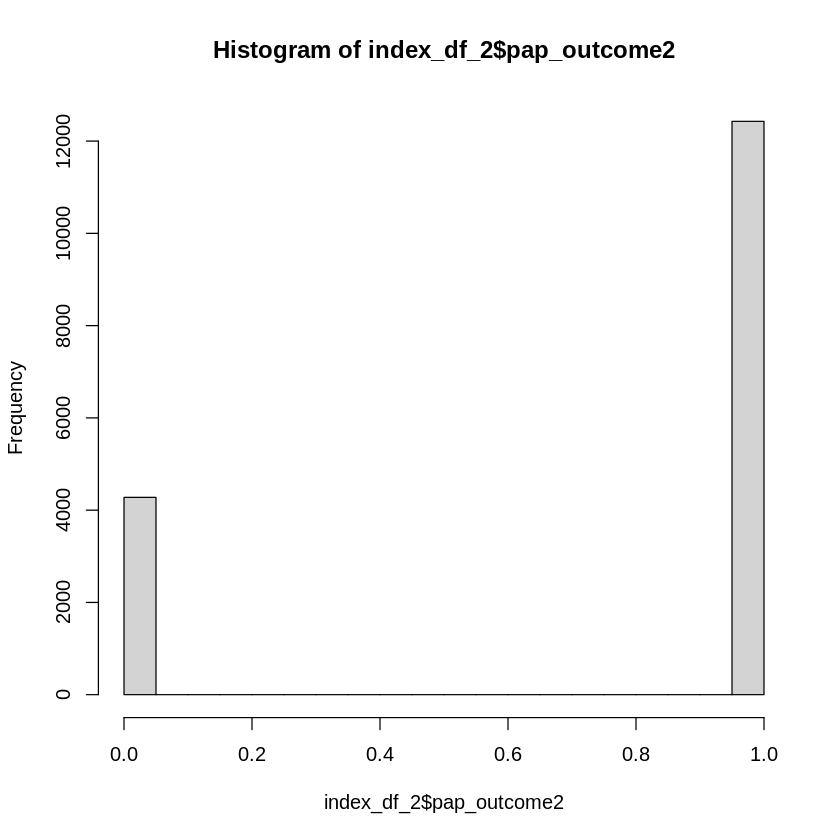

In [66]:
levels(index_df_2$pap_outcome2) <- c(
  "1",
  "0",
  "0"
)

index_df_2$pap_outcome2 <- as.integer(as.character(index_df_2$pap_outcome2))

hist(index_df_2$pap_outcome2)

#### poisson regression video 1:  https://www.youtube.com/watch?v=S7MkI6M4suc---
#### poisson regression video 2:https://www.youtube.com/watch?v=0XfXHYDYoBA-----

# robust poisson regression using conventional logistic regression--------------

model_1 <- glm(formula = pap_outcome2 ~ sdcgres + age + income + education + ms, family = poisson(link = "log"), data = index_df_2, weights = wts_m)

summary(model_1)


In [67]:
## check prevalence ratios
exp(coef(model_1))


(Intercept)               sdcgresRecent immigrant 
                            0.7719231                             0.7703275 
          sdcgresNon-recent immigrant                        sdcgresUnknown 
                            0.9799002                             0.9241341 
                             age35-54                              age55-69 
                            0.9506645                             0.7864221 
                income$20,000-$39,999                 income$40,000-$59,999 
                            1.0243249                             1.0578816 
                income$60,000-$79,999                 income$80,000 or more 
                            1.1127292                             1.1022141 
                        incomeUnknown educationAny post-secondary education 
                            1.0191492                             1.1033960 
                     educationUnknown          msWidowed/separated/divorced 
                            1.0544687                             0.9539460 
               msSingle/never married                             msUnknown 
                            0.8466744                             0.9581173

In [68]:
## confidence intervals for PR--------------------------------------------------

### used code from: from https://stats.oarc.ucla.edu/r/dae/poisson-regression/

## LT added for fellow classmates to try your code
#source('https://raw.githubusercontent.com/cran/sandwich/master/R/vcovHC.R')
#source('https://raw.githubusercontent.com/cran/sandwich/master/R/estfun.R')
#source()
library(sandwich)
#source('https://raw.githubusercontent.com/cran/sandwich/master/R/is.zoo.R')

cov.model_1 <- sandwich::vcovHC(model_1, type = "HC0")

In [69]:


std.err <- sqrt(diag(cov.model_1))
r.est <- cbind(
  Estimate = coef(model_1), "Robust SE" = std.err,
  "Pr(>|z|)" = 2 * pnorm(abs(coef(model_1) / std.err), lower.tail = FALSE),
  LL = coef(model_1) - 1.96 * std.err,
  UL = coef(model_1) + 1.96 * std.err
)

exp(r.est)


,Estimate,Robust SE,Pr(>|z|),LL,UL
(Intercept),0.7719231,1.034717,1.000000,0.7219770,0.8253245
sdcgresRecent immigrant,0.7703275,1.044616,1.000000,0.7071638,0.8391330
sdcgresNon-recent immigrant,0.9799002,1.019239,1.331965,0.9439753,1.0171924
sdcgresUnknown,0.9241341,1.076203,1.326671,0.8002438,1.0672044
age35-54,0.9506645,1.016249,1.001697,0.9211011,0.9811767
age55-69,0.7864221,1.021639,1.000000,0.7541060,0.8201230
"income$20,000-$39,999",1.0243249,1.036636,1.655595,0.9545752,1.0991711
"income$40,000-$59,999",1.0578816,1.035130,1.108678,0.9886598,1.1319500
"income$60,000-$79,999",1.1127292,1.034879,1.001838,1.0404132,1.1900717
"income$80,000 or more",1.1022141,1.033255,1.002935,1.0337587,1.1752025


In [70]:
deltamethod<-function (g, mean, cov, ses = TRUE) 
{
    cov <- as.matrix(cov)
    n <- length(mean)
    if (!is.list(g)) 
        g <- list(g)
    if ((dim(cov)[1] != n) || (dim(cov)[2] != n)) 
        stop(paste("Covariances should be a ", n, " by ", n, 
            " matrix"))
    syms <- paste("x", 1:n, sep = "")
    for (i in 1:n) assign(syms[i], mean[i])
    gdashmu <- t(sapply(g, function(form) {
        as.numeric(attr(eval(deriv(form, syms)), "gradient"))
    }))
    new.covar <- gdashmu %*% cov %*% t(gdashmu)
    if (ses) {
        new.se <- sqrt(diag(new.covar))
        new.se
    }
    else new.covar
}

s <- deltamethod(
  list(~ exp(x1), ~ exp(x2), ~ exp(x3), ~ exp(x4)),
  coef(model_1), cov.model_1
)

In [72]:

### exponentiate old estimates dropping the p values----------------------------

rexp.est <- exp(r.est[, -3])

### replace standard errors (ER) with estimates for exponentiated------------=--

rexp.est[, "Robust SE"] <- s

rexp.est

,Estimate,Robust SE,LL,UL
(Intercept),0.7719231,0.02634450,0.7219770,0.8253245
sdcgresRecent immigrant,0.7703275,0.03362457,0.7071638,0.8391330
sdcgresNon-recent immigrant,0.9799002,0.01867350,0.9439753,1.0171924
sdcgresUnknown,0.9241341,0.06786760,0.8002438,1.0672044
age35-54,0.9506645,0.02634450,0.9211011,0.9811767
age55-69,0.7864221,0.03362457,0.7541060,0.8201230
"income$20,000-$39,999",1.0243249,0.01867350,0.9545752,1.0991711
"income$40,000-$59,999",1.0578816,0.06786760,0.9886598,1.1319500
"income$60,000-$79,999",1.1127292,0.02634450,1.0404132,1.1900717
"income$80,000 or more",1.1022141,0.03362457,1.0337587,1.1752025


In [73]:



# create and format table two---------------------------------------------------

table_two <- data.frame(rexp.est)

table_two_df <- table_two

## add column for characteristic on the left side of the table------------------

table_two_df <- add_column(table_two_df, characteristic = "", .before = "Estimate")

## add in title rows to the table two dataframe---------------------------------

table_two_df <- rbind(
  table_two_df[1, ],
  c("Immigrant status (reference: non-immigrants)", "", "", "", ""),
  table_two_df[2:4, ],
  c("Age (reference: age 20–34)", "", "", "", ""),
  table_two_df[5:6, ],
  c("Income (reference: >$20,000)", "", "", "", ""),
  table_two_df[7:11, ],
  c("Level of education (reference: secondary graduation or less)", "", "", "", ""),
  table_two_df[12:13, ],
  c("Marital status (reference: married/common-law)", "", "", "", ""),
  table_two_df[14:16, ]
)


In [76]:
## add in intercept label-------------------------------------------------------

table_two_df[1, "characteristic"] <- "Intercept"

## add in immigrant status labels-----------------------------------------------

table_two_df[c(3, 4, 5), "characteristic"] <- c(
  "Recent immigrants (<10 years in Canada)",
  "Non-recent immigrants (>=10 years in Canada)",
  "Unknown"
)

## add in age labels------------------------------------------------------------
table_two_df[c(7, 8), "characteristic"] <- c(
  "Age 35–54",
  "Age 55–69"
)

## add in income labels---------------------------------------------------------
table_two_df[c(10, 11, 12, 13, 14), "characteristic"] <- c(
  "$20,000–$39,999",
  "$40,000–$59,999",
  "$60,000–$79,999",
  "$80,000 or more",
  "Unknown"
)

In [77]:
## add in education labels------------------------------------------------------

table_two_df[c(16, 17), "characteristic"] <- c(
  "Any post-secondary education",
  "Unknown"
)


## add in marital status labels-------------------------------------------------

table_two_df[c(19, 20, 21), "characteristic"] <- c(
  "Widowed/separated/divorced",
  "Single/never married",
  "Unknown"
)

## remove row names and replace with numbers -----------------------------------

rownames(table_two_df) <- 1:21

## add column names names and replace with numbers -----------------------------

colnames(table_two_df) <- c("Characteristic", "Prevalence Ratio", "Robust Standard Error", "Lower 95% CI", "Upper 95% CI")

## change variables to numeric--------------------------------------------------

table_two_df$`Prevalence Ratio` <- round(as.numeric(table_two_df$`Prevalence Ratio`), 2)
table_two_df$`Lower 95% CI` <- round(as.numeric(table_two_df$`Lower 95% CI`), 2)
table_two_df$`Upper 95% CI` <- round(as.numeric(table_two_df$`Upper 95% CI`), 2)

## create final version of table two--------------------------------------------

table_two_df_final <- table_two_df[, c("Characteristic", "Prevalence Ratio", "Lower 95% CI", "Upper 95% CI")]

## add p value to final table two-----------------------------------------------

table_two_df$`Robust Standard Error` <- as.numeric(table_two_df$`Robust Standard Error`)

table_two_df$`P Value` <- exp(-0.717 * abs((log(table_two_df$`Prevalence Ratio`) / table_two_df$`Robust Standard Error`))
  - 0.416 * ((log(table_two_df$`Prevalence Ratio`) / table_two_df$`Robust Standard Error`))^2)

table_two_df$`P Value` <- round(as.numeric(table_two_df$`P Value`), 10)
table_two_df$`P Value 2` <- NA
table_two_df$`P Value 2`[round(table_two_df$`P Value`, 2) <= 0.05] <- "a"
table_two_df_final$`P Value` <- table_two_df$`P Value 2` 

In [78]:
table_two_df_final

,Characteristic,Prevalence Ratio,Lower 95% CI,Upper 95% CI,P Value
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Intercept,0.77,0.72,0.83,a
2,Immigrant status (reference: non-immigrants),NA,NA,NA,NA
3,Recent immigrants (<10 years in Canada),0.77,0.71,0.84,a
4,Non-recent immigrants (>=10 years in Canada),0.98,0.94,1.02,NA
5,Unknown,0.92,0.80,1.07,NA
6,Age (reference: age 20–34),NA,NA,NA,NA
7,Age 35–54,0.95,0.92,0.98,a
8,Age 55–69,0.79,0.75,0.82,a
9,"Income (reference: >$20,000)",NA,NA,NA,NA
